In [8]:
import pandas as pd
from pathlib import Path
import os

# Directory where the bird dataset is stored
XC_ROOTDIR = os.getcwd() 
XC_DIR = 'spectrograms_windowed_dataset'

# Initialize an empty list to store file details
filelist = []

# Walk through the directories of species
species_dir = os.path.join(os.getcwd(), XC_ROOTDIR, XC_DIR)
for species_folder in os.listdir(species_dir):
    species_path = os.path.join(species_dir, species_folder)
    if os.path.isdir(species_path):  # Ensure it's a directory
        for file_name in os.listdir(species_path):
            if file_name.endswith('.png'):  # Filter for .wav files
                filelist.append({
                    'fullfilename': os.path.join(species_path, file_name),
                    'filename': Path(file_name).stem,
                    'species': species_folder  # The folder name is the species
                })

# Create a DataFrame with the gathered file details
df_files_wav = pd.DataFrame(filelist)

# Display a summary of the DataFrame
print('=====================================================')
print(f'Number of files: {len(df_files_wav)}')
print(f'Number of species: {len(df_files_wav["species"].unique())}')
print('=====================================================')

# Print the first few rows of the DataFrame to verify
df_files_wav

Number of files: 6586
Number of species: 20


,fullfilename,filename,species
0,/Users/solomongreene/DIS/DIS Core Course/data/...,XC627720_4,American Redstart
1,/Users/solomongreene/DIS/DIS Core Course/data/...,XC825244_13,American Redstart
2,/Users/solomongreene/DIS/DIS Core Course/data/...,XC934359_1,American Redstart
3,/Users/solomongreene/DIS/DIS Core Course/data/...,XC825248_3,American Redstart
4,/Users/solomongreene/DIS/DIS Core Course/data/...,XC934360_5,American Redstart
...,...,...,...
6581,/Users/solomongreene/DIS/DIS Core Course/data/...,XC102199_2,Prothonotary Warbler
6582,/Users/solomongreene/DIS/DIS Core Course/data/...,XC324896_2,Prothonotary Warbler
6583,/Users/solomongreene/DIS/DIS Core Course/data/...,XC563725_5,Prothonotary Warbler
6584,/Users/solomongreene/DIS/DIS Core Course/data/...,XC173797_4,Prothonotary Warbler


In [10]:
import math

def calculate_windows(seconds):
    a = seconds - 30
    b = a / 10
    return math.ceil(b)

print(calculate_windows(60*4 +1))

22


/var/folders/48/lcmjrzwd68l3cc344b5b_q_m0000gn/T/ipykernel_79764/2840912371.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_counts.index, y=species_counts.values, palette="viridis")


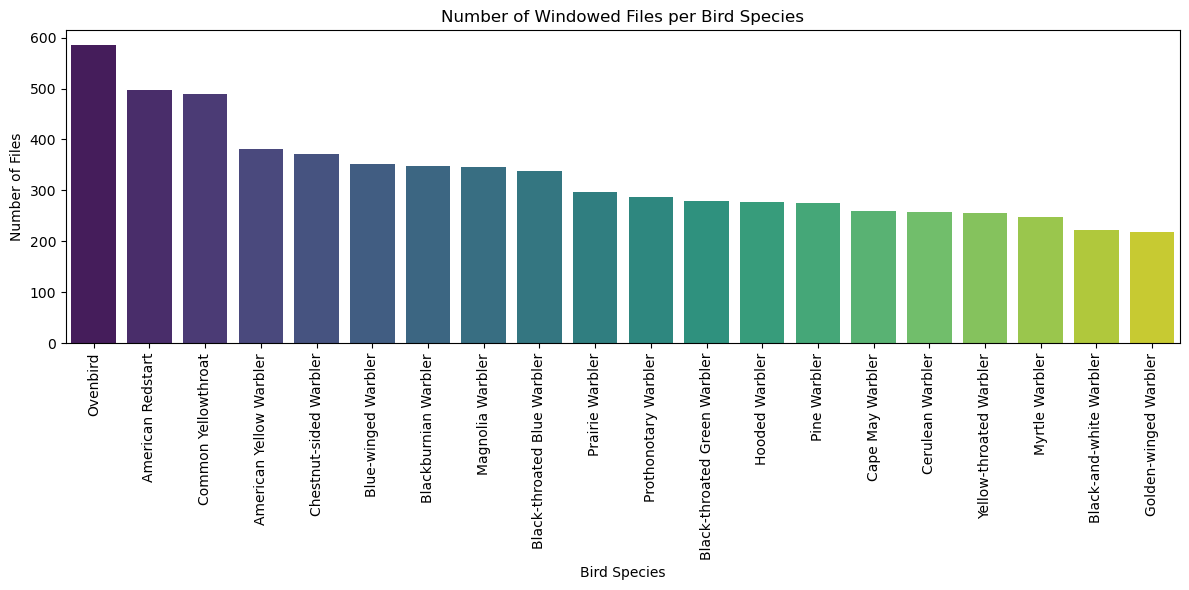

/var/folders/48/lcmjrzwd68l3cc344b5b_q_m0000gn/T/ipykernel_79764/2840912371.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


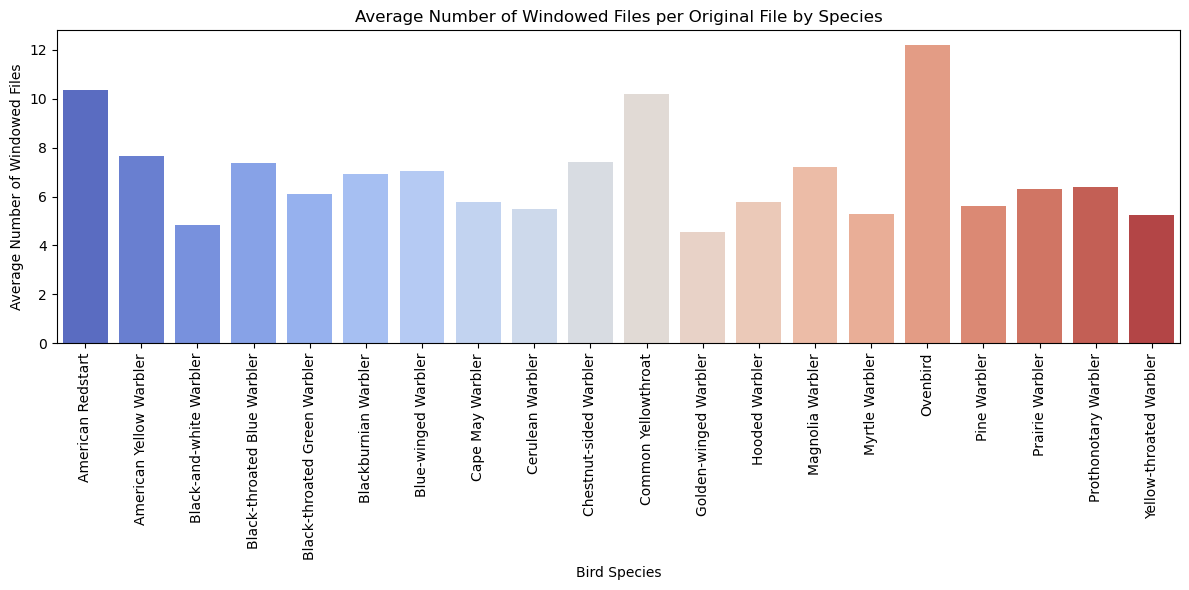

/var/folders/48/lcmjrzwd68l3cc344b5b_q_m0000gn/T/ipykernel_79764/2840912371.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=windowed_file_counts.index.get_level_values(0), y=windowed_file_counts.values, palette="magma")


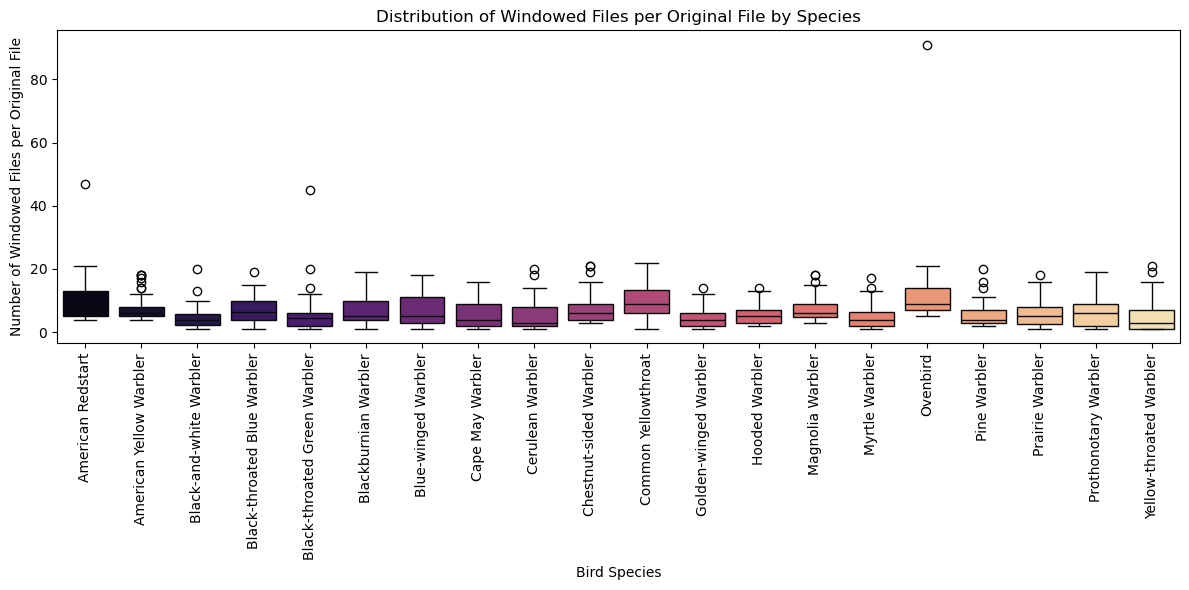

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataframe (assuming it is named df_final for clarity)
df_final = df_files_wav

# Extract bird species and count occurrences
species_counts = df_final['species'].value_counts()

# Calculate the average number of windowed files per original file per species
df_final['original_file'] = df_final['filename'].str.split('_').str[0]  # Extract original file names
avg_windowed_files = (
    df_final.groupby('species')['original_file']
    .nunique()
    .to_frame('unique_original_files')
    .merge(species_counts.to_frame('total_windowed_files'), left_index=True, right_index=True)
)
avg_windowed_files['avg_windowed_files_per_original'] = (
    avg_windowed_files['total_windowed_files'] / avg_windowed_files['unique_original_files']
)

# Plot the number of files per bird species
plt.figure(figsize=(12, 6))
sns.barplot(x=species_counts.index, y=species_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Number of Windowed Files per Bird Species")
plt.xlabel("Bird Species")
plt.ylabel("Number of Files")
plt.tight_layout()
plt.show()

# Plot the average number of windowed files per original file for each species
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_windowed_files.index,
    y=avg_windowed_files['avg_windowed_files_per_original'],
    palette="coolwarm"
)
plt.xticks(rotation=90)
plt.title("Average Number of Windowed Files per Original File by Species")
plt.xlabel("Bird Species")
plt.ylabel("Average Number of Windowed Files")
plt.tight_layout()
plt.show()

# Visualize the distribution of windowed file counts per original file
windowed_file_counts = df_final.groupby(['species', 'original_file']).size()
plt.figure(figsize=(12, 6))
sns.boxplot(x=windowed_file_counts.index.get_level_values(0), y=windowed_file_counts.values, palette="magma")
plt.xticks(rotation=90)
plt.title("Distribution of Windowed Files per Original File by Species")
plt.xlabel("Bird Species")
plt.ylabel("Number of Windowed Files per Original File")
plt.tight_layout()
plt.show()


We can see here that there are 3 huge outliers way above the max number for a single original file of 4 min which is 22. So, we need to go back and remove or somehow check on those outliers 

In [11]:
# Identify original files with more than 22 windowed spectrograms
max_windowed_threshold = 22
windowed_file_counts = df_final.groupby(['species', 'original_file']).size()

# Filter for outliers
outliers = windowed_file_counts[windowed_file_counts > max_windowed_threshold]

if not outliers.empty:
    print("Outliers detected: Files with more than 22 windowed spectrograms:")
    for (species, original_file), count in outliers.items():
        print(f"Species: {species}, Original File: {original_file}, Windowed Files: {count}")
else:
    print("No outliers detected: All files have 22 or fewer windowed spectrograms.")


Outliers detected: Files with more than 22 windowed spectrograms:
Species: American Redstart, Original File: XC924064, Windowed Files: 47
Species: Black-throated Green Warbler, Original File: XC922249, Windowed Files: 45
Species: Ovenbird, Original File: XC922808, Windowed Files: 91


This confirms our suspicions

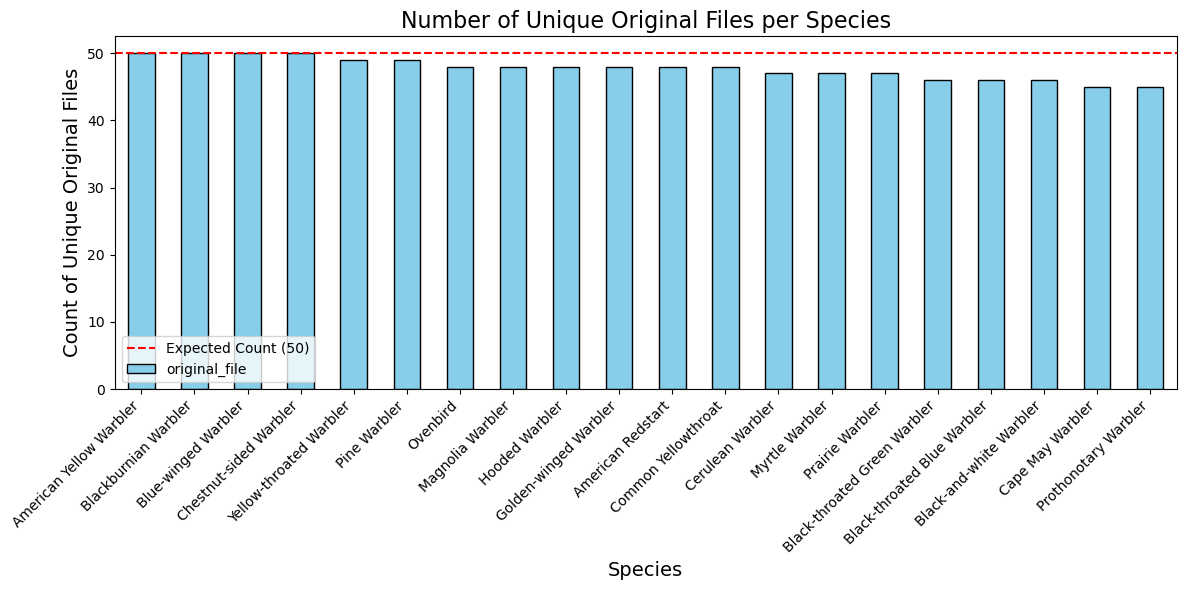

In [12]:
import matplotlib.pyplot as plt

# Calculate the number of unique original files per species
unique_original_files = df_final.groupby('species')['original_file'].nunique()

# Plot the results
plt.figure(figsize=(12, 6))
unique_original_files.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Add a horizontal line to indicate the expected count of 50
plt.axhline(y=50, color='red', linestyle='--', linewidth=1.5, label="Expected Count (50)")

# Customize the plot
plt.title("Number of Unique Original Files per Species", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Count of Unique Original Files", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


And we have some problems here with some bird types having more corrupted files than others. We need to also correct this.